In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging 
import math
import vanet_tools as vp

In [3]:
df = pd.read_csv("manhattan_out.csv",delimiter=";").dropna()
MICROCLOUD_RANGE=150

Checking if cars rode for a reasonable amount of time

In [4]:
groups = df.groupby('vehicle_id')
vehicles = df['vehicle_id'].unique()
vehicle_times = [len(groups.get_group(vehicle)) for vehicle in vehicles]

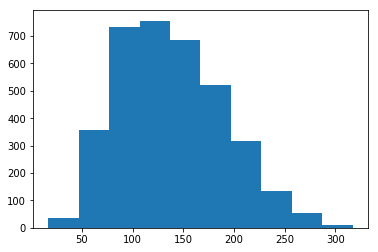

In [5]:
plt.hist(vehicle_times)
plt.show()

In [6]:
np.mean(vehicle_times)

137.79944444444445

In [7]:
simulator = vp.Simulator(df)

In [8]:
coordinates = df[['vehicle_x','vehicle_y']]

In [9]:
coords_x,coords_y = coordinates['vehicle_x'],coordinates['vehicle_y']

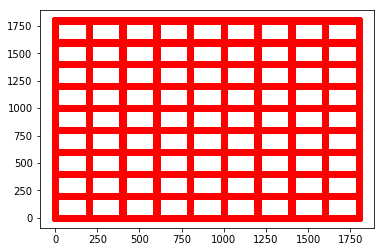

In [10]:
plt.scatter(coords_x,coords_y,c='red')
plt.show()

In [11]:
NUM_MICROCLOUDS = 70

In [12]:
microclouds_coords = vp.create_coords(coordinates,MICROCLOUD_RANGE,num_microclouds=NUM_MICROCLOUDS)

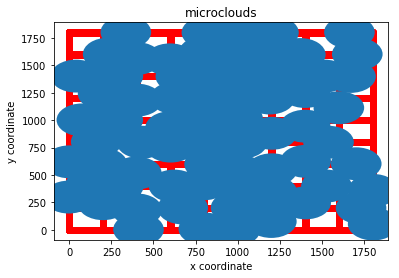

In [13]:
vp.plot_microclouds(microclouds_coords,MICROCLOUD_RANGE,coords_x,coords_y)

In [14]:
config_file = "manhattan_config.csv"

In [15]:
vp.store_microcloud_config(microclouds_coords,config_file)

In [16]:
#Making sure the microclouds were stored
microclouds_coords = vp.parse_configuration(config_file)

In [33]:
TOTAL_BLOCKS=12

In [17]:
results = simulator.simulation_by_number_of_clouds(microclouds_coords,MICROCLOUD_RANGE,step=5,total_blocks=TOTAL_BLOCKS)

INFO:root:Setting up simulation with 1 num of clouds
INFO:root:Finished setup started simulation with 1 microclouds
INFO:root:Setting up simulation with 6 num of clouds
INFO:root:Finished setup started simulation with 6 microclouds
INFO:root:Setting up simulation with 11 num of clouds
INFO:root:Finished setup started simulation with 11 microclouds
INFO:root:Setting up simulation with 16 num of clouds
INFO:root:Finished setup started simulation with 16 microclouds
INFO:root:Setting up simulation with 21 num of clouds
INFO:root:Finished setup started simulation with 21 microclouds
INFO:root:Setting up simulation with 26 num of clouds
INFO:root:Finished setup started simulation with 26 microclouds
INFO:root:Setting up simulation with 31 num of clouds
INFO:root:Finished setup started simulation with 31 microclouds
INFO:root:Setting up simulation with 36 num of clouds
INFO:root:Finished setup started simulation with 36 microclouds
INFO:root:Setting up simulation with 41 num of clouds
INFO:r

In [18]:
results_df = pd.DataFrame(results)

In [19]:
results_df

,average_files_downloaded,average_latency,block_percentage,files_downloaded,ninety_five_percentile,num_clouds
0,0.000000,NaN,0.022338,0,0.0,1
1,0.000000,NaN,0.126042,0,0.0,6
2,0.000000,NaN,0.269236,0,0.0,11
3,0.009722,165.400000,0.370833,35,0.0,16
4,0.022222,157.975000,0.430625,80,0.0,21
5,0.043056,159.832258,0.513750,155,1.0,26
6,0.064444,156.681034,0.558611,232,2.0,31
7,0.090833,152.504587,0.591019,327,3.0,36
8,0.137222,146.831984,0.644097,494,3.0,41
9,0.160000,145.640625,0.669190,576,3.0,46


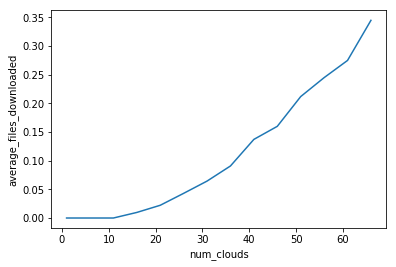

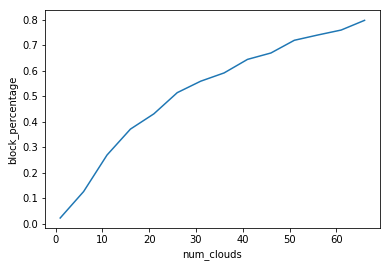

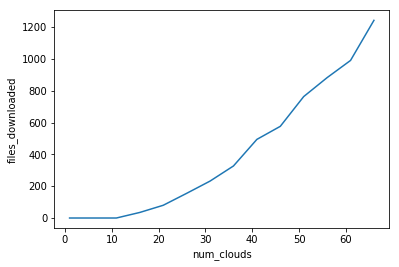

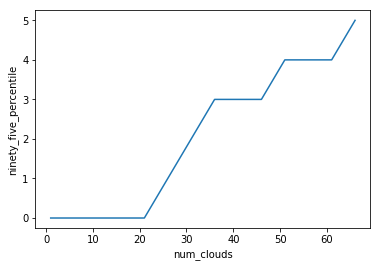

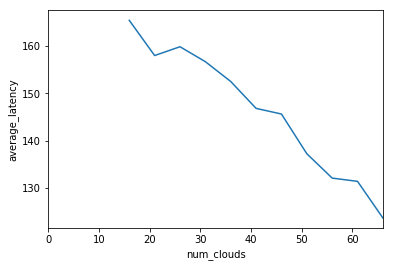

In [20]:
vp.plot_results(results_df)

In [34]:
results_df['ninety_five_percentile'] = results_df['ninety_five_percentile'].apply(lambda x: x/TOTAL_BLOCKS)

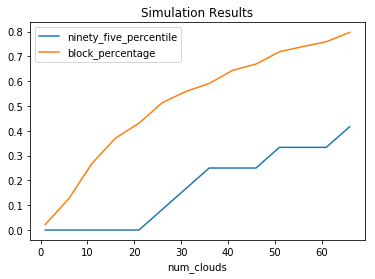

In [35]:
plt.plot(results_df['num_clouds'],results_df['ninety_five_percentile'])
plt.plot(results_df['num_clouds'],results_df['block_percentage'])
plt.xlabel('num_clouds')
plt.title('Simulation Results')
plt.legend(loc='best')
plt.show()

In [21]:
results_max =simulator.simulation_by_number_of_clouds(microclouds_coords,MICROCLOUD_RANGE,step=5,bandwith=5)

INFO:root:Setting up simulation with 1 num of clouds
INFO:root:Finished setup started simulation with 1 microclouds
INFO:root:Setting up simulation with 6 num of clouds
INFO:root:Finished setup started simulation with 6 microclouds
INFO:root:Setting up simulation with 11 num of clouds
INFO:root:Finished setup started simulation with 11 microclouds
INFO:root:Setting up simulation with 16 num of clouds
INFO:root:Finished setup started simulation with 16 microclouds
INFO:root:Setting up simulation with 21 num of clouds
INFO:root:Finished setup started simulation with 21 microclouds
INFO:root:Setting up simulation with 26 num of clouds
INFO:root:Finished setup started simulation with 26 microclouds
INFO:root:Setting up simulation with 31 num of clouds
INFO:root:Finished setup started simulation with 31 microclouds
INFO:root:Setting up simulation with 36 num of clouds
INFO:root:Finished setup started simulation with 36 microclouds
INFO:root:Setting up simulation with 41 num of clouds
INFO:r

In [22]:
results_max_df = pd.DataFrame(results_max)

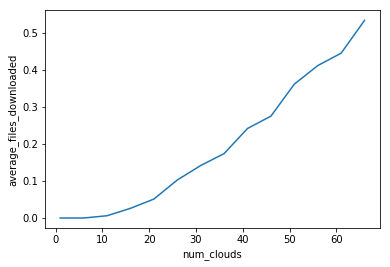

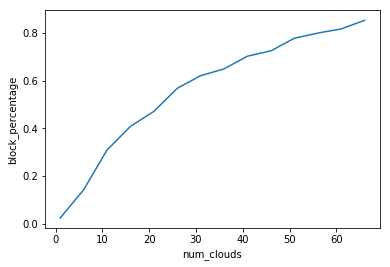

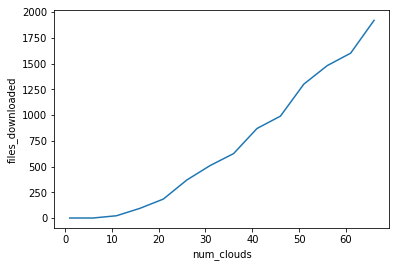

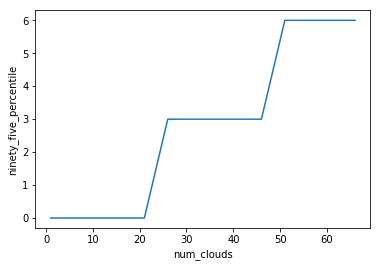

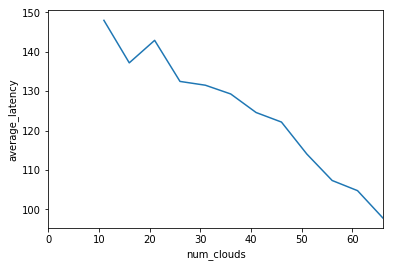

In [23]:
vp.plot_results(results_max_df)

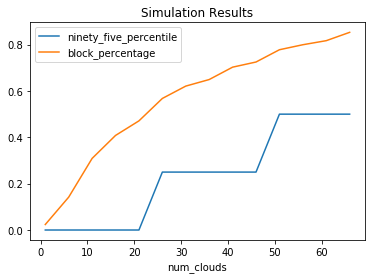

In [36]:
results_max_df['ninety_five_percentile'] = results_max_df['ninety_five_percentile'].apply(lambda x: x/TOTAL_BLOCKS)
plt.plot(results_max_df['num_clouds'],results_max_df['ninety_five_percentile'])
plt.plot(results_max_df['num_clouds'],results_max_df['block_percentage'])
plt.xlabel('num_clouds')
plt.title('Simulation Results')
plt.legend(loc='best')
plt.show()

In [24]:
MICROCLOUD_LONG_RANGE =300

In [25]:
microclouds_coords_long_range = vp.create_coords(coordinates,MICROCLOUD_LONG_RANGE,num_microclouds=25)

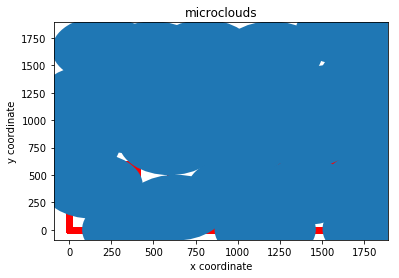

In [26]:
vp.plot_microclouds(microclouds_coords_long_range,MICROCLOUD_LONG_RANGE,coords_x,coords_y)

In [27]:
long_results = simulator.simulation_by_number_of_clouds(microclouds_coords_long_range,MICROCLOUD_LONG_RANGE,step=2)

INFO:root:Setting up simulation with 1 num of clouds
INFO:root:Finished setup started simulation with 1 microclouds
INFO:root:Setting up simulation with 3 num of clouds
INFO:root:Finished setup started simulation with 3 microclouds
INFO:root:Setting up simulation with 5 num of clouds
INFO:root:Finished setup started simulation with 5 microclouds
INFO:root:Setting up simulation with 7 num of clouds
INFO:root:Finished setup started simulation with 7 microclouds
INFO:root:Setting up simulation with 9 num of clouds
INFO:root:Finished setup started simulation with 9 microclouds
INFO:root:Setting up simulation with 11 num of clouds
INFO:root:Finished setup started simulation with 11 microclouds
INFO:root:Setting up simulation with 13 num of clouds
INFO:root:Finished setup started simulation with 13 microclouds
INFO:root:Setting up simulation with 15 num of clouds
INFO:root:Finished setup started simulation with 15 microclouds
INFO:root:Setting up simulation with 17 num of clouds
INFO:root:Fi

In [28]:
long_results_df = pd.DataFrame(long_results)

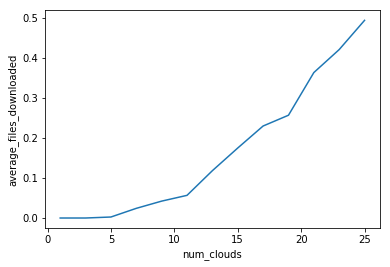

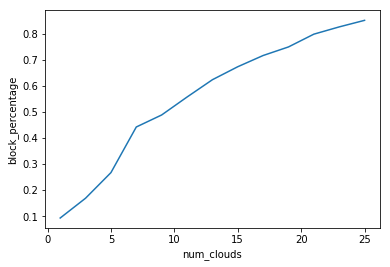

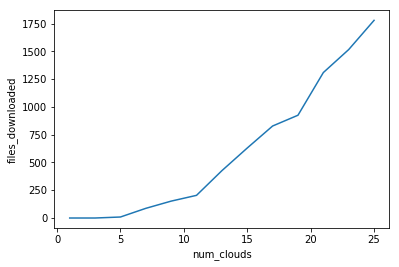

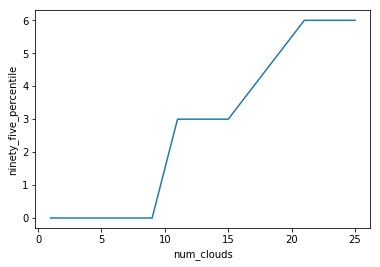

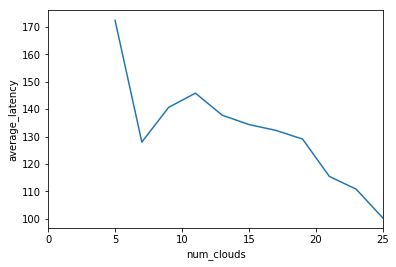

In [29]:
vp.plot_results(long_results_df)

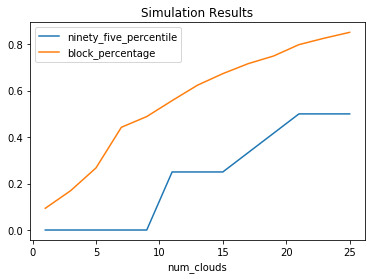

In [37]:
long_results_df['ninety_five_percentile'] = long_results_df['ninety_five_percentile'].apply(lambda x: x/TOTAL_BLOCKS)
plt.plot(long_results_df['num_clouds'],long_results_df['ninety_five_percentile'])
plt.plot(long_results_df['num_clouds'],long_results_df['block_percentage'])
plt.xlabel('num_clouds')
plt.title('Simulation Results')
plt.legend(loc='best')
plt.show()

In [30]:
long_results_max = simulator.simulation_by_number_of_clouds(microclouds_coords_long_range,MICROCLOUD_LONG_RANGE,step=2,bandwith=5)

INFO:root:Setting up simulation with 1 num of clouds
INFO:root:Finished setup started simulation with 1 microclouds
INFO:root:Setting up simulation with 3 num of clouds
INFO:root:Finished setup started simulation with 3 microclouds
INFO:root:Setting up simulation with 5 num of clouds
INFO:root:Finished setup started simulation with 5 microclouds
INFO:root:Setting up simulation with 7 num of clouds
INFO:root:Finished setup started simulation with 7 microclouds
INFO:root:Setting up simulation with 9 num of clouds
INFO:root:Finished setup started simulation with 9 microclouds
INFO:root:Setting up simulation with 11 num of clouds
INFO:root:Finished setup started simulation with 11 microclouds
INFO:root:Setting up simulation with 13 num of clouds
INFO:root:Finished setup started simulation with 13 microclouds
INFO:root:Setting up simulation with 15 num of clouds
INFO:root:Finished setup started simulation with 15 microclouds
INFO:root:Setting up simulation with 17 num of clouds
INFO:root:Fi

In [31]:
long_results_max_df = pd.DataFrame(long_results_max)

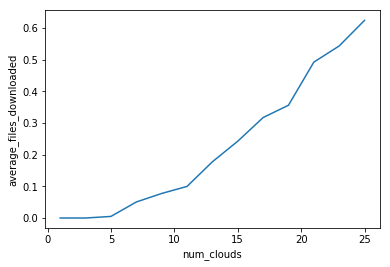

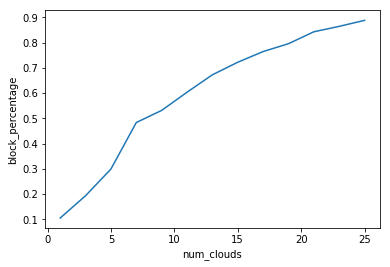

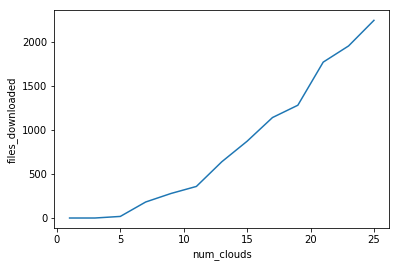

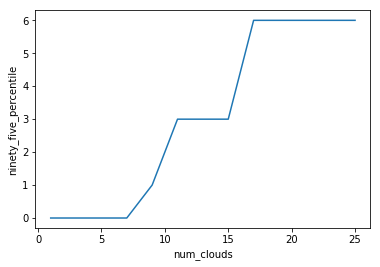

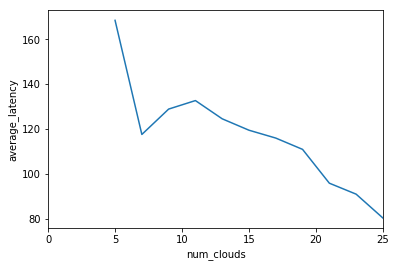

In [32]:
vp.plot_results(long_results_max_df)

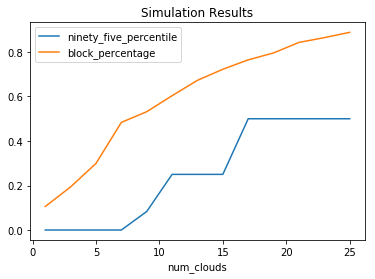

In [38]:
long_results_max_df['ninety_five_percentile'] = long_results_max_df['ninety_five_percentile'].apply(lambda x: x/TOTAL_BLOCKS)
plt.plot(long_results_max_df['num_clouds'],long_results_max_df['ninety_five_percentile'])
plt.plot(long_results_max_df['num_clouds'],long_results_max_df['block_percentage'])
plt.xlabel('num_clouds')
plt.title('Simulation Results')
plt.legend(loc='best')
plt.show()